# LEADING Boot-Camp: Data Cleaning and Preprocessing

## 1. Concepts
### 1.1 Data Science Project
For a Data Science Project, we usually need to go through these main steps:

- Understanding the Objective
- Data Acquisition
- Data Cleaning & Pre-processing
- Gain insights from Exploratory Data Analysis
- Data preparation for Machine Learning
- Select proper model(s)
    * supervised or unsupervised?
    * regression or classification?
    * if with label, univariate regression/classification or multivariate regression/classification?
    * what performance measure(s) to use?
- Train model with hyperparameter tuning
- Prediction & performance evaluation
- Present Solution
- Lauch, Monitor and maintain the system



### 1.2 What is data cleaning?

>Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. 

Data cleaning is the process of ensuring the data is correct, consistent and usable. You can clean data by identifying errors or corruptions, correcting or deleting them, or manually processing data as needed to prevent the same errors from occurring. A portion of data cleaning must be done manually, which is an essential part of managing data.

The procedure of data cleaning can remove major errors and inconsistencies that are inevitable when multiple sources of data are being pulled into one dataset. Besides, it allows you to map different data functions, and better understand what your data is intended to do, and learn where it is coming from.

Data cleaning usually consists of two phases: 
+ Error detection: various errors and violations are identified and possibly validated 
+ Error repair: updates to the database, bring data to a cleaner state suitable for downstream applications and analytics.

### 1.3 Data Proprocessing

The procedure of data preprocessing involves the transformation of the raw dataset into an understandable format. Preprocessing data is a fundamental stage in data mining to improve data efficiency. The data preprocessing methods directly affect the outcomes of any analytic algorithm.

## 2. Working with data

### 2.1 Data observation

We will use California Housing data as example. It contains data drawn from the 1990 U.S. Census: realted literature:
*Pace, R. Kelley, and Ronald Barry, "Sparse Spatial Autoregressions," Statistics and Probability Letters, Volume 33, Number 3, May 5 1997, p. 291-297.*
>We collected information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 characteristics.

In [1]:
import pandas as pd
housing = pd.read_csv('./data/housing.csv')

In [2]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Question**: What information you can get from above observation? (Hint: missing values, data type)

In [4]:
# take a look how many districts belong to each category
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# check value distribution of numerical attributes/columns
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


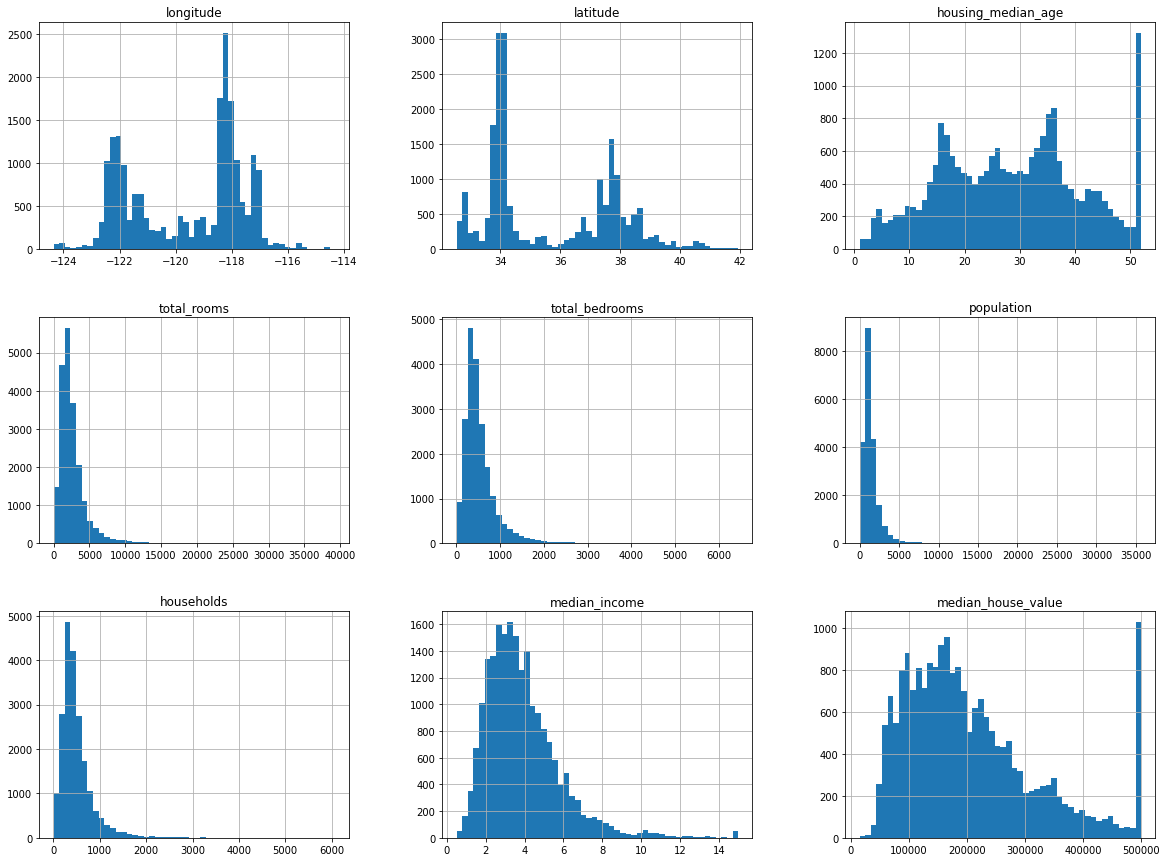

In [6]:
# plot a histogram for each numerical attribute 
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### 2.2 Data cleaning

#### 2.2.1 Zero-Variance Attributes
Zero-variance attributes refer to input features that contain a single value across the entire spectrum of observations. Accordingly, they do not add any value to the prediction algorithm since the target variable is not affected by the input value, making them redundant. Some Machine Learning algorithms might also run into unexpected errors or output wrong results.


In [7]:
housing_temp = housing.copy()
housing_temp['region_zip'] = 90650

In [8]:
# count and list the number of unique values in each column of a Pandas dataframe
housing_temp.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
region_zip                1
dtype: int64

In [9]:
housing_temp.drop(columns = housing_temp.columns[housing_temp.nunique() == 1])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
housing_temp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,region_zip
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,90650
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,90650
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,90650
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,90650
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,90650


In [11]:
housing_temp.drop(columns = housing_temp.columns[housing_temp.nunique() == 1], inplace=True)

In [12]:
housing_temp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 2.2.2 Columns with Very Few Unique Values
Special consideration should be given to columns that have very few numbers of unique values (aka, low-variance, or near-zero variance). Such columns are not automatic candidates to be dropped from the dataset. For example, ordinal or categorical columns, by design, are not expected to have a high number of unique values.

Intuitively, we can naively drop low-variance columns, but what if such attributes were actually informative for model learning? For example, assume that a binary feature in a classification problem has lots of zeroes and few ones (near-zero variance predictor). The target variable is always the same when this input feature is equal to one; however, it can be either of the possible target values in case this feature is zero. It is certainly justified to keep this column as one of our predictors.

Therefore, contextual considerations and domain knowledge should be utilized to evaluate whether such low-variance columns should be dropped from our dataset or not. For example:
* Consider encoding them as ordinal variables
* Consider encoding them as categorical variables
* Consider combining these low-variance columns through some dimensionality reduction techniques, e.g., Principal Component Analysis (PCA)

In [13]:
# manually calculate the number of unique values in each column as a percentage of the total number of observations
import numpy as np

for i in range(housing_temp.shape[1]):
    num = len(np.unique(housing_temp.iloc[:, i]))
    percentage = float(num) / housing_temp.shape[0] * 100
    print('Column number %d, unique value count %d, percentage count %.3f%%' % (i, num, percentage))

Column number 0, unique value count 844, percentage count 4.089%
Column number 1, unique value count 862, percentage count 4.176%
Column number 2, unique value count 52, percentage count 0.252%
Column number 3, unique value count 5926, percentage count 28.711%
Column number 4, unique value count 2130, percentage count 10.320%
Column number 5, unique value count 3888, percentage count 18.837%
Column number 6, unique value count 1815, percentage count 8.794%
Column number 7, unique value count 12928, percentage count 62.636%
Column number 8, unique value count 3842, percentage count 18.614%
Column number 9, unique value count 5, percentage count 0.024%


Alternatively, we can utilize the `scikit-learn` library’s `VarianceThreshold` class to identify and drop low-variance columns. Be caution when using `VarianceThreshold` class, as it is designed to drop columns that are below the parameterized threshold.

In [14]:
housing_temp = housing.drop(columns=['ocean_proximity'])

In [15]:
# import the required library
from sklearn.feature_selection import VarianceThreshold

# define the transform
# default threshold parameter is 0, can be set to any float value. 
# All features with variance below this threshold will be removed
selector = VarianceThreshold(threshold = 10)

# fit the defined transform on dataset
selector.fit(housing_temp)

# transform the dataset and save as a new dataframe 
housing_temp_clean = pd.DataFrame(selector.transform(housing_temp), 
                                  columns = housing_temp.columns[selector.get_support(indices=False)])

In [16]:
housing_temp_clean.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
0,41.0,880.0,129.0,322.0,126.0,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,358500.0
2,52.0,1467.0,190.0,496.0,177.0,352100.0
3,52.0,1274.0,235.0,558.0,219.0,341300.0
4,52.0,1627.0,280.0,565.0,259.0,342200.0


#### 2.2.3 Duplicate Data

Duplicate rows should be dropped from your data, given that they would most likely be redundant anyway.
Pandas provides a simple function to check for any duplicate rows in a dataframe.

In [17]:
housing_temp_clean = housing_temp_clean.append({'housing_median_age': 41.0, 'total_rooms': 880.0, 'total_bedrooms': 129.0,
                          'population': 322.0, 'households': 126.0, 'median_house_value': 452600.0},
                          ignore_index=True)

In [18]:
housing_temp_clean[housing_temp_clean.duplicated()]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
20640,41.0,880.0,129.0,322.0,126.0,452600.0


In [19]:
# to drop duplicates
housing_temp_clean.drop_duplicates(inplace=True)

#### 2.2.4 Outlier Detection

Outliers are any data points that appear to be rare or unlikely in the context of a given dataset. Domain knowledge and subject matter expertise come in handy to identify outliers. Although there is no standard definition of outliers given their contextual nature, various statistical and plotting measures can be used to identify and appropriately deal with them.

Similar to low-variance columns, outlier observations are not automatic candidates for dropping. Instead, these should be analyzed further to determine if they really are anomalous or not.

Box and whisker plotting is a simple and basic way to visualize numerical outliers in your dataframe:

<AxesSubplot:>

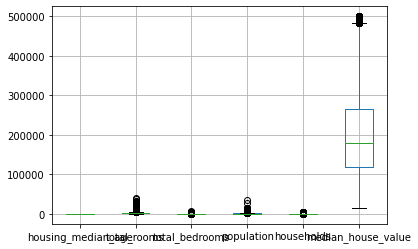

In [20]:
housing_temp_clean.boxplot()

##### 2.2.4.1 Outlier Detection using Standard Deviation (SD)
SD techniques for outlier detection can be applied to all numerical features that exhibit a Gaussian or Gaussian-like distribution. 
+ 68% of normally distributed observations lie within 1 SD of the mean
+ 95% of normally distributed observations lie within 2 SD of the mean
+ 99.7% of normally distributed observations lie within 3 SD of the mean

In [21]:
housing_temp_clean.shape

(20640, 6)

In [22]:
housing_temp_clean[housing_temp_clean.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
0,41.0,880.0,129.0,322.0,126.0,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,358500.0
2,52.0,1467.0,190.0,496.0,177.0,352100.0
3,52.0,1274.0,235.0,558.0,219.0,341300.0
4,52.0,1627.0,280.0,565.0,259.0,342200.0
...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,78100.0
20636,18.0,697.0,150.0,356.0,114.0,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,84700.0


##### 2.2.4.2 Outlier Detection using the Interquartile Range (IQR)
We can use IQR to identify outliers in an input feature that does not follow a normal or normal-like distribution. Values that are outside a specified threshold (usually, 1.5 times IQR above the 75th percentile and below the 25th percentile) are filtered out for further analysis.



In [23]:
# Calculate 1st and 3rd percentiles, and IQR
Q1 = housing_temp_clean.quantile(0.25)
Q3 = housing_temp_clean.quantile(0.75)
IQR = Q3 - Q1

# Filter out the rows that fall outside the 1.5 threshold in each column
housing_temp_clean[~((housing_temp_clean < (Q1 - 1.5 * IQR)) | (housing_temp_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value
0,41.0,880.0,129.0,322.0,126.0,452600.0
2,52.0,1467.0,190.0,496.0,177.0,352100.0
3,52.0,1274.0,235.0,558.0,219.0,341300.0
4,52.0,1627.0,280.0,565.0,259.0,342200.0
5,52.0,919.0,213.0,413.0,193.0,269700.0
...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,78100.0
20636,18.0,697.0,150.0,356.0,114.0,77100.0
20637,17.0,2254.0,485.0,1007.0,433.0,92300.0
20638,18.0,1860.0,409.0,741.0,349.0,84700.0


### 2.3 Data Preprocessing

#### 2.3.1 Missing values

Missing values are not rare occurrences in real-life data. Most Machine Learning algorithms are unable to handle missing values and will throw up an error during model training. Therefore, such missing values in a dataset should be either dropped (the most naive way, and to be avoided as much as possible — data is the new currency!) or be somehow imputed logically.
Certain effective descriptive statistics that are usually applied for such imputation include:
* the mean value of a column
* the median value of a column
* the mode value of a column
* some other common value

In [24]:
# detect missing values 
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [25]:
housing.shape

(20640, 10)

In [26]:
housing.dropna(axis=1).shape

(20640, 9)

In [27]:
housing.dropna(axis=0).shape

(20433, 10)

Statistically imputing missing values is pretty straight-forward using Python’s built-in functions. 

The following functions calculate the descriptive statistic for each column and use that calculated statistic to fill in all empty values in the corresponding column.

In [28]:
housing_temp = housing.drop(columns=['ocean_proximity'])

In [29]:
# using mean to fill missing values
housing_temp.fillna(housing_temp.mean())#.isnull().sum()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [30]:
# using median to fill missing values
housing_temp.fillna(housing_temp.median())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [31]:
# using mode to fill missing values
housing_temp.fillna(housing_temp.mode())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [32]:
# using a specific constant to fill missing values, such as 0
housing_temp.fillna(0)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [33]:
from sklearn.impute import SimpleImputer

# define a list of all strategies to be evaluated
strategies = ['mean', 'median', 'most_frequent', 'constant']

# for loop to evaluate all the strategies
for strategy in strategies:
    # define imputer
    imputer = SimpleImputer(strategy=strategy)
    # impute
    housing_temp_imputed = imputer.fit_transform(housing_temp)
    # print imputed total_bedrooms column new mean value
    print('Imputing strategy: %s, column mean after imputing  %.3f' % (strategy, housing_temp_imputed[:, 4].mean()))

Imputing strategy: mean, column mean after imputing  537.871
Imputing strategy: median, column mean after imputing  536.839
Imputing strategy: most_frequent, column mean after imputing  535.284
Imputing strategy: constant, column mean after imputing  532.476


In [34]:
housing_temp_imputed[:, 4].mean()

532.47621124031

#### 2.3.2 Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

Suppose we have a dataset having two features of the players, i.e Height(cm), weight(kg). Some algorithms are sensitive to feature scaling, for example, linear regression. Since both, the feature's height, and weight have different scales and there is a chance that higher weight is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature, So we perform feature scaling.

##### 2.3.2.1 Standard Scaler
The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.
If data is not normally distributed, this is not the best Scaler to use.

$$X_{new} = \frac{X-\mu}{\sigma}$$

##### 2.3.2.2 Min-Max Scaler
Essentially shrinks the range of each attribute, such that the range is between 0 and 1. (bounded range)
When the distribution of the attribute is not Gaussian or the standard deviation is very small, the min-max scaler works better than standardization. 

$$X_{new} = \frac{X-X_{min}}{X_{max}-X_{min}}$$

##### 2.3.2.3 Robust Scaler
This Scaler is robust to outliers. If the data contains many outliers, scaling using the mean and standard deviation of the data won’t work well. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

$$X_{new} = \frac{X-X_{Q1}}{X_{Q3}-X_{Q1}}$$

In [35]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3 

Text(0.5, 1.0, 'RobustScaler')

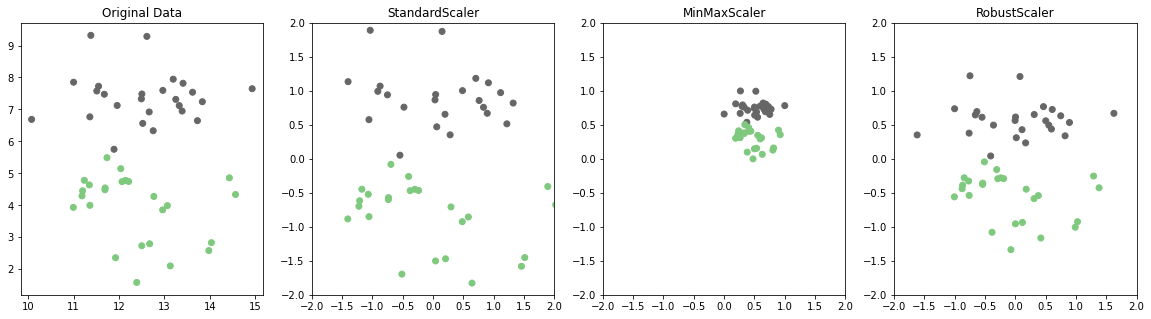

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

plt.sca(axes[0])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
plt.title('Original Data')


plt.sca(axes[1])
X_ = StandardScaler().fit_transform(X)
plt.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('StandardScaler')

plt.sca(axes[2])
X_ = MinMaxScaler().fit_transform(X)
plt.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('MinMaxScaler')

plt.sca(axes[3])
X_ = RobustScaler().fit_transform(X)
plt.scatter(X_[:, 0], X_[:, 1], c=y, cmap="Accent")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('RobustScaler')

#### 2.3.3 Categorical attributes

So far we have only dealt with numerical attributes. Now let's preprocess the categorical input feature, `ocean_proximity`.

Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s `OrdinalEncoder` class.

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:5]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.]])

We can get the list of categories using the `categories_` instance variable. It is a list containing a 1D array of categories for each categorical attribute.

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

What is the problem here??

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the `ocean_proximity` column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category. The new attributes are sometimes called *dummy attributes*. Scikit-Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors.

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method.

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [40]:
# get the list of categories
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 3. Putting into a pipeline

In [41]:
# load in data
housing = pd.read_csv('./data/housing.csv')

In [42]:
# split data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [43]:
# separate the predictors and the labels
x_train = train_set.drop("median_house_value", axis=1) # drop labels for training set
y_train = train_set["median_house_value"].copy()

In [44]:
# imputer, strategy: median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [45]:
# build pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


housing_num = x_train.drop("ocean_proximity", axis=1)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

x_train_transformed = full_pipeline.fit_transform(x_train)

In [46]:
x_train_transformed.shape

(16512, 13)

In [47]:
full_pipeline.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])>

**Evaluate performance**
Compare against the actual values:

A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors.

$$RMSE = \sqrt{\frac{1}{m}\sum_{i = 1}^m(y_{pred}^{(i)})-y^{(i)})^2}$$

In [48]:
# train with a regression alrithm (more details in week 2)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train_transformed, y_train)
train_predictions = lin_reg.predict(x_train_transformed)
lin_mse = mean_squared_error(y_train, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68433.93736666226

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_transformed, y_train)
train_predictions = tree_reg.predict(x_train_transformed)
tree_mse = mean_squared_error(y_train, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Check performance on test set

In [51]:
# separate the predictors and the labels
x_test = test_set.drop("median_house_value", axis=1) 
y_test = test_set["median_house_value"].copy()

# transform the test set
x_test_transformed = full_pipeline.transform(x_test)

In [52]:
test_predictions = lin_reg.predict(x_test_transformed)
lin_mse = mean_squared_error(y_test, test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

70059.19333925014

In [53]:
test_predictions = tree_reg.predict(x_test_transformed)
tree_mse = mean_squared_error(y_test, test_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

68883.45680500842

## 4. Exercise

### 4.1 kNN Imputation of Missing Values
Other than using descriptive statistics to impute missing values, an Machine Learning algorithm can also be used to predict them. A simple regression model can be used to predict missing values; however, the k-nearest neighbors (kNN) model has been found to be effective in practice as well.
Scikit-learn’s `KNNImputer` class supports kNN imputation — which is very similar to SimpleImputer in its usage. 

```
# import the required library
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer()

# fit on the training dataset
x_train_transformed = imputer.fit_transformed(x_train)

# transform on the testing dataset
x_test_transfromed = imputer.transform(x_test)
```

Replace the `SimpleImputer` into `KNNImputer`, see how switching the imputing strategy affecting the final generalization performance

In [54]:
## code here
from sklearn.impute import KNNImputer

num_pipeline_1 = Pipeline([
        ('imputer', KNNImputer()),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline_1 = ColumnTransformer([
        ("num", num_pipeline_1, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

x_train_transformed = full_pipeline_1.fit_transform(x_train)

In [56]:
# transform the test set
x_test_transformed = full_pipeline_1.transform(x_test)

In [57]:
lin_reg.fit(x_train_transformed, y_train)

test_predictions = lin_reg.predict(x_test_transformed)
lin_mse = mean_squared_error(y_test, test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69302.39870063751

In [58]:
tree_reg.fit(x_train_transformed, y_train)

test_predictions = tree_reg.predict(x_test_transformed)
tree_mse = mean_squared_error(y_test, test_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

68611.15406480324